# Assignment 2

Student Name: Vo, Huynh Quang Nguyen

CWID: A20446163

Use the data in the file `TAMPALMS.RData` for this problem.

Real estate investors, homebuyers, and homeowners often use the appraised (or market) value of a property as a basis for predicting sale price. Data on sale prices (in thousands of dollars) and total appraised market values (in thousands of dollars) of 76 residential properties sold in 2008 in an upscale Tampa, Florida, neighborhood named Tampa Palms are saved in the `TAMPALMS` file. 

In [1]:
dat <- get(load("../datasets/TAMPALMS.Rdata"))
head(dat)

Property,Market_Val,Sale_Price
1,181.44,382
2,191.00,230
3,159.83,220
4,189.22,277
5,151.61,205
6,166.40,250


a. Write the SLR model that can be used to predict the sale price based on the market value. Make sure that you include all necessary components of the model.

***
**Answers:**

The SLR model that predicted the sale price based on the market value for the given sample (76 residential properties sold in Tampa Palms in 2008) is given as:
$$
\text{Sale Price} = \hat{\beta_0} + \hat{\beta_1}\text{Market Value}
$$

Denote $\mathbf{Y}$ as a vector containing all observations of the sale price, and $\mathbf{X}$ as a vector containing all observations of the market value. The SLR model applicable for the entire population is given as:
$$
\mathbf{Y} = \beta_0 + \beta_1\mathbf{X} + \mathbf{\epsilon}
$$
with $\epsilon$ is the error (or deviation) from the actual observations of the sale price $\mathbf{Y}$ to the predicted value of the sale price $\hat{\mathbf{Y}} = \beta_0 + \beta_1\mathbf{X}$.

b. Fit the model using R and report the fitted model.

***
**Answers:**

The corresponding R-code is as follows:

In [2]:
slr_model <- lm(Sale_Price ~ Market_Val, data = dat)
summary(slr_model)


Call:
lm(formula = Sale_Price ~ Market_Val, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-282.171  -24.829    1.807   29.791  188.792 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.35868   13.76817   0.099    0.922    
Market_Val   1.40827    0.03693  38.132   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 68.76 on 74 degrees of freedom
Multiple R-squared:  0.9516,	Adjusted R-squared:  0.9509 
F-statistic:  1454 on 1 and 74 DF,  p-value: < 2.2e-16



c. Plot the two variables to create a scatter plot. Use a solid dot for each data point and make the size of the dots half of what you get by default. Make the color of the dots black. The title of the plot should be `Scatter plot`. Use appropriate x-axis label and y-axis label so that the viewer knows what variables are plotted along the two axes. Finally, add the fitted regression line to the plot. Make the color of this line red. Based on the plot, comment on the nature of the relationship between the two variables and whether using a simple linear regression is appropriate. 

***
**Answers:**

The corresponding R-code is as follows:

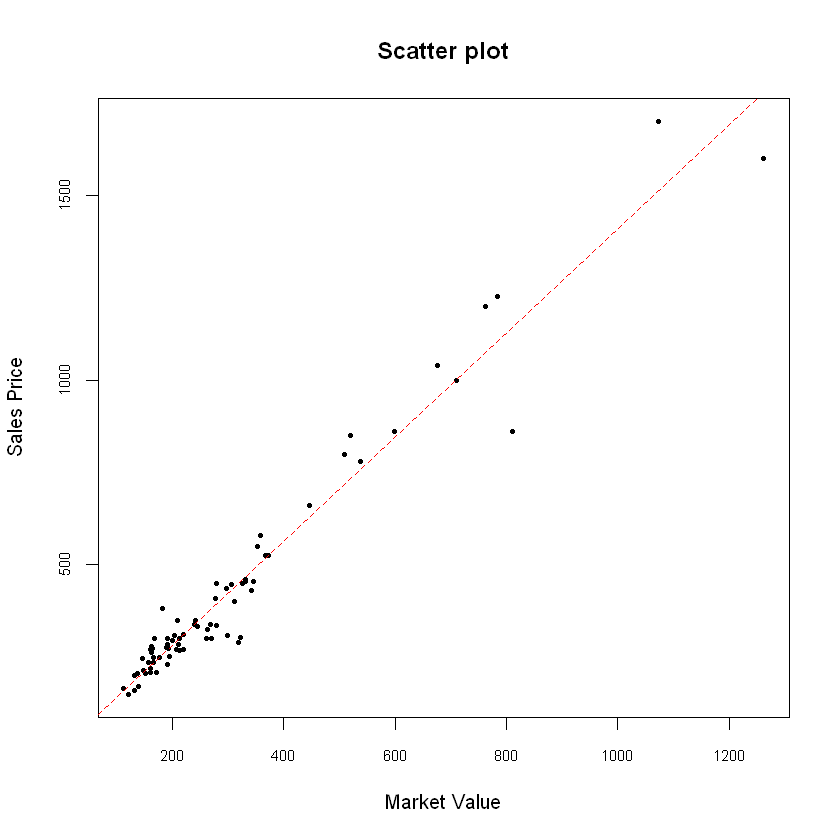

In [11]:
plot(dat$Market_Val, dat$Sale_Price,
    xlab = "Market Value", ylab = "Sales Price", 
    cex.axis = 0.75,
    pch = 16, col = "black", cex = 0.5,
    main = "Scatter plot")
abline(slr_model, col = "red", lty = "dashed")

According to the graph, there is a positive linear relationship between the two variables. On the other hand, the regression line is a good fit of the given data. Therefore, using a simple linear regression is appropriate here.

d. What is the estimate of the error variance? 

***

**Answers:**

The estimate of the error variance ($\sigma_\epsilon^2$) is given as:
$$
s_{\epsilon}^2 = \frac{\text{SSE}}{\text{DOF}} = \frac{\text{SSE}}{n-2} 
$$

with $\text{SSE} = \sum_{i =1}^n(y_i - \hat{y_i})^2$ is the sum of squares of errors, and $\text{DOF} = n -2$ is the degree of freedom. Therefore, $s_{\epsilon}^2 \approx 4727.4697$. The corresponding R-code (computing the error variance based on its definition and getting the error variance from the model summary) is as follows: 

In [26]:
residuals <- slr_model$residuals
ssquared <- sum(residuals ** 2) / (76 - 2)
ssquared

ssquared <- 68.79 ** 2
ssquared

[1] 4727.47

[1] 4732.064

e. Report the standard error of $\beta_0$. How would you interpret it?

---

**Answers:**

The estimated standard error of the intercept $\beta_0$ is given as:
$$
\text{SE}_{\beta_0} = \sqrt{s_{\epsilon}^2\Big[\frac{1}{n} + \frac{\bar{x}^2}{\text{SS}_{xx}}\Big]}
$$
with $\text{SS}_{xx} = \sum_{i = 0}^n (x_i - \bar{x})$. Therefore, $\text{SE}_{\beta_0} \approx 13.7749$. We can interpret $\text{SE}_{\beta_0}$ as the standard deviation of the intercepts coming from models fitted on multiple samples drawn from the population to the model's intercept fitted on the entire population. 

The corresponding R-code (computing the standard error the intercept and getting the standard error from the model summary) is as follows:


In [30]:
SS_xx <- sum((dat$Market_Val - mean(dat$Market_Val)) ** 2)
beta_0_error <- sqrt(ssquared * (1 / 76 + mean(dat$Market_Val) ** 2 / SS_xx))
beta_0_error

beta_0_error <- summary(slr_model)$coefficients[1,2]
beta_0_error

[1] 13.77486

[1] 13.76817


f. Find the predicted increase in the sale price for $5,000 increase in the market value.

---

**Answers:**

The corresponding R-code is as follows:

In [21]:
X <- 5000
beta_0 <- summary(slr_model)$coefficients[1,1]
beta_1 <- summary(slr_model)$coefficients[2,1]
Y <- beta_0 + beta_1 * X
Y

[1] 7042.712

g. Does the market value have a significant predictive ability to predict the sale price? Justify using an appropriate hypothesis test. (must include all necessary details as discussed in the class) 

---

**Answers:**

We can formulate the hypothesis test as follows:
$$
\begin{cases}
H_0: \beta_1 = 0 \\
H_1: \beta_2 \neq 0
\end{cases}
$$

1. Using the p-value approach: we can see that the p-value extracted from the model's summary is less than $2\times10^{-16}$. Hence, we can reject the null hypothesis. Therefore, we can conclude that a significant predictive ability to predict the sale price.

2. Using the rejection threshold approach: 
    * We first compute the t-statistic of the model: $t_0 = \frac{\hat{\beta_1} - 0}{\text{SE}_{\beta_1}} \approx 38.1136 $.
    * We then evaluate whether the computed t-statistic lies within the rejection region of the t-distribution with 74 degrees of freedom and $\alpha = 0.05$. The rejection region is $|t| > t_{\alpha/2} = 1.9925$, and $|t_0| = 38.1136 > t_{\alpha/2}$. Therefore, we reject the null hypothesis.

The corresponding R-code for the second approach is as follows:

In [32]:
beta_1_error <- sqrt(ssquared / SS_xx)
t_0 <- summary(slr_model)$coefficients[2,1] / beta_1_error
t_0

[1] 38.11365

h. Find the correlation coefficient between the two variables of interest. Use an appropriate hypothesis testing method to test if the population correlation coefficient is significantly different from 0. Clearly write out the null and alternative hypotheses and how you reach your conclusion. Is the p-value for this test same as the p-value you found in part (g)?

---

**Answers:**

The hypothesis test concerning the correlation coefficient $\rho$ is given as:
$$
\begin{cases}
H_0: \rho = 0 \\
H_1: \rho \neq 0
\end{cases}
$$
1. We can evaluate the results of our hypothesis using the p-value approach. Our p-value is $2.2\times10^{-16}$ that is lower than the significant level. Therefore, we reject our null hypothesis. Noted that this p-value is not the same we found in part (g).

2. We can use the rejection region approach for our hypothesis test:
    * We compute the correlation coefficient as 0.9754858. From here, we compute the corresponding $t$-statistic: $t_0 = \frac{r\sqrt{76 - 2}}{\sqrt{1 - R^2}} = 38.12$, with $R^2$ is the coefficient of determination.
    * We then evaluate whether the computed correlation coefficient lies within the rejecton region of the t-distribution with 74 degrees of freedom and $\alpha = 0.05$. The rejection region is $|t| > t_{\alpha/2} = 1.9925$, and $|t_0| = 38.132 > t_{\alpha/2}$. Therefore, we reject the null hypothesis.

The corresponding R-code for the first approach is as follows:


In [36]:
cor.test(dat$Market_Val, dat$Sale_Price, conf.level = 0.95)


	Pearson's product-moment correlation

data:  dat$Market_Val and dat$Sale_Price
t = 38.132, df = 74, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9614894 0.9844357
sample estimates:
      cor 
0.9754858 


i. Find the predicted sale price for a home with a market value $200,000.

---

**Answers:**

The corresponding R_code is as follows:

In [25]:
X <- 200000
beta_0 <- summary(slr_model)$coefficients[1,1]
beta_1 <- summary(slr_model)$coefficients[2,1]
Y <- beta_0 + beta_1 * X
Y

[1] 281655.5

Test at 1% level the following hypothesis testing problem:
$$
\begin{cases}
H_0: β_1 = 1 \\
H_1: β_1 \neq 1
\end{cases}
$$

What can you conclude about the nature of the relationship about the two variables based on this test?

***

**Answers:**

We use the rejection threshold approach to evaluate our hypothesis test: 
* We first compute the t-statistic of the model: $t_0 = \frac{\hat{\beta_1} - 1}{\text{SE}_{\beta_1}} \approx 11.0495 $.
* We then evaluate whether the computed t-statistic lies within the rejection region of the t-distribution with 74 degrees of freedom and $\alpha = 0.1$. The rejection region is $|t| > t_{\alpha/2} = 1.6657$, and $|t_0| = 11.0495 > t_{\alpha/2}$. Therefore, we reject the null hypothesis.

Based on this test, we can say these two variables (Market Value and Sales Price) are proportional to one another.

In [37]:
beta_1_error <- sqrt(ssquared / SS_xx)
t_0 <- (summary(slr_model)$coefficients[2,1] - 1)/ beta_1_error
t_0

[1] 11.0495